In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import *
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
# C is the inverse of the regularization strength
lasso = LogisticRegression(penalty='l1', C=0.1, solver='saga') # abs
ridge = LogisticRegression(penalty='l2', C=0.1, solver='saga') # square
elastic = LogisticRegression(penalty='elasticnet', C=0.1, l1_ratio=0.5, solver='saga') # mix


In [73]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, np.unique(y_train)

((105, 4), (105,), (45, 4), (45,), array([0, 1, 2]))

In [29]:
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('Lasso accuracy:', lasso.score(X_test, y_test))

Lasso accuracy: 0.9111111111111111


/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [30]:
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('Ridge accuracy:', ridge.score(X_test, y_test))

Ridge accuracy: 0.9777777777777777


/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)
print('Elastic accuracy:', elastic.score(X_test, y_test))

Elastic accuracy: 0.9555555555555556


/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [46]:
#coefs
coef_lasso = lasso.coef_
coef_ridge = ridge.coef_
coef_elastic = elastic.coef_

coef_lasso, coef_ridge, coef_elastic

(array([[ 0.        ,  0.        , -1.12814856,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.77950426,  0.        ]]),
 array([[ 0.09310051,  0.5302527 , -0.93003896, -0.40216657],
        [ 0.0748715 , -0.31814111,  0.12148061, -0.15744251],
        [-0.16797201, -0.21211159,  0.80855835,  0.55960908]]),
 array([[ 0.        ,  0.46126055, -1.08670335,  0.        ],
        [ 0.        , -0.017805  ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.71310045,  0.28325608]]))

<h3>Computing Regularization Path</h3>

/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


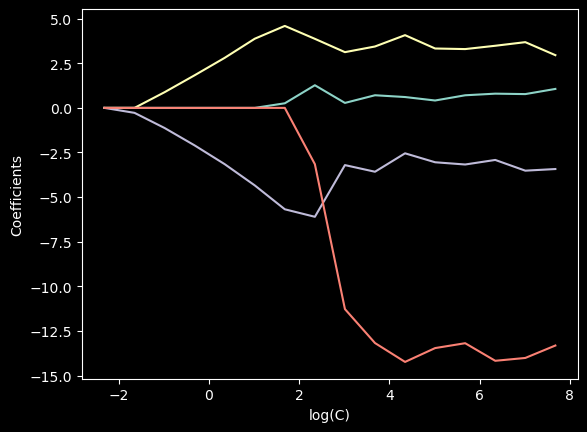

In [69]:
cs = sklearn.svm.l1_min_c(X, y, loss="log") * np.logspace(0, 10, 16)
log_lnr = LogisticRegression(penalty='l1', solver='liblinear')

coefs = []
for c in cs:
    log_lnr.set_params(C=c)
    log_lnr.fit(X_train, y_train)
    coefs.append(log_lnr.coef_[0])
coefs = np.array(coefs)

plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.plot(np.log10(cs), coefs)

In [70]:
'''
C is high, the regularization effect is weak, and the model can have larger coefficients. 
This is why the coefficients tend to have higher values.

C is low, the regularization effect is strong, forcing many coefficients to be zero or near zero. 
This results in a sparser model with fewer non-zero coefficients.
'''

'\nC is high, the regularization effect is weak, and the model can have larger coefficients. \nThis is why the coefficients tend to have higher values.\n\nC is low, the regularization effect is strong, forcing many coefficients to be zero or near zero. \nThis results in a sparser model with fewer non-zero coefficients.\n'